In [1]:
import pandas as pd

In [7]:
data = pd.read_csv('TCell (1).csv', sep = ';') #sep makes the semicolons become columns 

def clean_cell(cell):
    if isinstance(cell, str) and ',' in cell:
        commas_replaced = cell.replace(',', '.')
        float_form = float(commas_replaced)
        return float_form
    else:
        return cell

data = data.applymap(clean_cell)

In [9]:
data.index += 1

In [82]:
data = data.dropna(subset = ['emphysema_severity'])

In [22]:
non_smoker_cd4_cd8 = data['cd4_cd8_ratio'][data['smoking_status'] == 'never smoker'].astype(float).tolist()
smoker_cd4_cd8 = data['cd4_cd8_ratio'][data['smoking_status'] != 'never smoker'].astype(float).tolist()

In [23]:
# mean/SD non-smoking cd4/cd8
total_sum = 0
for number in non_smoker_cd4_cd8:
    total_sum += number
mean_nonsmoker = total_sum / len(non_smoker_cd4_cd8)

total_sum = 0
for number in non_smoker_cd4_cd8:
    difference = abs(number - mean_nonsmoker)
    total_sum += difference
SD_nonsmoker = total_sum / len(non_smoker_cd4_cd8)

In [24]:
# mean/SD smoking cd4/cd8
total_sum = 0
for number in smoker_cd4_cd8:
    total_sum += number
mean_smoker = total_sum / len(smoker_cd4_cd8)

total_sum = 0
for number in smoker_cd4_cd8:
    difference = abs(number - mean_smoker)
    total_sum += difference
SD_smoker = total_sum / len(smoker_cd4_cd8)

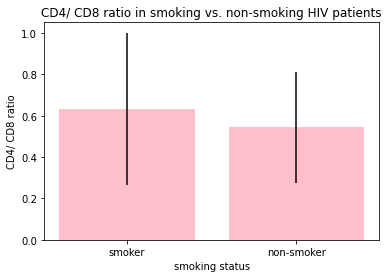

In [25]:
import matplotlib.pyplot as plt

plt.bar(x = ['smoker', 'non-smoker'], height = [mean_smoker, mean_nonsmoker], 
        color = 'pink', yerr = [SD_smoker, SD_nonsmoker])
plt.xlabel('smoking status')
plt.ylabel('CD4/ CD8 ratio')
plt.title('CD4/ CD8 ratio in smoking vs. non-smoking HIV patients')
plt.savefig('smoker_chart.png')

In [29]:
data['emphysema_severity'].value_counts()

0.0    70
1.0    43
2.0    29
4.0    12
3.0    10
Name: emphysema_severity, dtype: int64

In [37]:
#emphysema_0 = data['cd4_cd8_ratio'][data['emphysema_severity'] == 0.0].astype(float).tolist()
#emphysema_1 = data['cd4_cd8_ratio'][data['emphysema_severity'] == 1.0].astype(float).tolist()
#emphysema_2 = data['cd4_cd8_ratio'][data['emphysema_severity'] == 2.0].astype(float).tolist()
#emphysema_3 = data['cd4_cd8_ratio'][data['emphysema_severity'] == 3.0].astype(float).tolist()
#emphysema_4 = data['cd4_cd8_ratio'][data['emphysema_severity'] == 4.0].astype(float).tolist()

In [108]:
severity_levels = data['emphysema_severity'].unique()
cd4_cd8_ratios = {}

for level in severity_levels:
    cd4_cd8_ratios[level] = data['cd4_cd8_ratio'][data['emphysema_severity'] == level].astype(float).tolist()

In [119]:
#remove outliers
for ratios in cd4_cd8_ratios.values():
    for num in ratios:
        if num > 2.0:
            ratios.remove(num)

In [121]:
emphysema_0 = cd4_cd8_ratios[0.0]
emphysema_1 = cd4_cd8_ratios[1.0]
emphysema_2 = cd4_cd8_ratios[2.0]
emphysema_3 = cd4_cd8_ratios[3.0]
emphysema_4 = cd4_cd8_ratios[4.0]

In [133]:
def find_mean_and_SD(num_list):
    total_sum = 0
    for number in num_list:
        total_sum += number
    mean = total_sum / len(num_list)
    
    for number in num_list:
        SD = sum([abs(number - mean) for number in num_list]) / len(num_list)

    return mean, SD

In [142]:
#mean emphysema_0
mean_e0, SD_e0 = find_mean_and_SD(emphysema_0)

In [136]:
#mean emphysema_1
mean_e1, SD_e1 = find_mean_and_SD(emphysema_1)

In [139]:
#mean emphysema_2
mean_e2, SD_e2 = find_mean_and_SD(emphysema_2)

In [138]:
#mean emphysema_3
mean_e3, SD_e3 = find_mean_and_SD(emphysema_3)

In [140]:
#mean empysema_4
mean_e4, SD_e4 = find_mean_and_SD(emphysema_3)

Text(0.5, 1.0, 'does CD4/ CD8 ratio impact the severity of emphysema in HIV patients?')

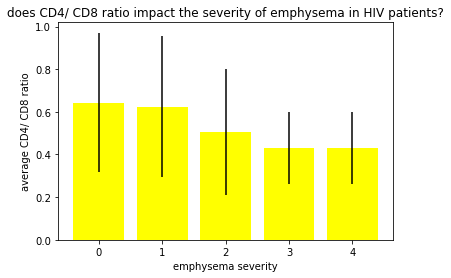

In [166]:
import matplotlib.pyplot as plt
plt.bar (x = ['0', '1', '2', '3', '4'], height = [mean_e0, mean_e1, mean_e2, mean_e3, mean_e4], 
        color = 'yellow', yerr = [SD_e0, SD_e1, SD_e2, SD_e3, SD_e4])
plt.xlabel('emphysema severity')
plt.ylabel('average CD4/ CD8 ratio')
plt.title('does CD4/ CD8 ratio impact the severity of emphysema in HIV patients?')

In [169]:
from scipy.stats import linregress

x = data['cd4_cd8_ratio'][data['cd4_cd8_ratio'].astype(float) <= 2].astype(float)
y = data['emphysema_severity'][data['cd4_cd8_ratio'].astype(float) <= 2].astype(float)

slope, intercept, r_value, p_value, std_err = linregress(x,y)

In [83]:
emphysema_severity = data['emphysema_severity'].astype(int).tolist()
cd4_cd8_ratio = data['cd4_cd8_ratio'].astype(float).tolist()

Text(0, 0.5, 'CD4/ CD8 ratio')

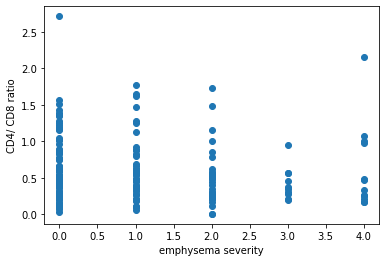

In [84]:
import matplotlib.pyplot as plt
plt.scatter( x = emphysema_severity, y = cd4_cd8_ratio)
plt.xlabel('emphysema severity')
plt.ylabel('CD4/ CD8 ratio')